### This notebook demonstrates the pipeline of generating hybrid hyperbolic (HH) parameters and G/Gmax curves.

The hybrid hyperbolic (HH) model is a stress-strain model for describing 1D shearing behaviors of soils. It is capable of capturing both the small-strain and the large-strain behaviors, which makes it suitable for modeling very strong ground motions. This model has been shown to outperform the prevalent stress-strain model (the modified Kondner-Zelasko, or "MKZ", model) by a considerable margin.

For more details, see this paper:

J. Shi and D. Asimaki (2017) "From stiffness to strength: Formulation and validation of a hybrid hyperbolic nonlinear soil model for site-response analyses". Bulletin of the Seismological Society of America. Vol. 107, No. 3. pp. 1336-1355. http://resolver.caltech.edu/CaltechAUTHORS:20170404-150827374.

(_This notebook takes about 10 minutes to read through._)

# 1. The most common scenario: users only know $V_S$ profiles

The most common scenario is that the users only know the shear-wave ($V_S$) velocity profile of a site.

In [1]:
import numpy as np

In [2]:
from PySeismoSoil.class_hh_calibration import HH_Calibration
from PySeismoSoil.class_Vs_profile import Vs_Profile

The API documentation of the `HH_Calibration` class is [here](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_hh_calibration.html). The API documentation of the `Vs_Profile` class is [here](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_Vs_profile.html), and the examples of this class are [here](./Demo_02_Vs_Profile.ipynb).

## 1.1. Import $V_S$ profile

In [3]:
vs_profile = Vs_Profile('../tests/files/profile_FKSH14.txt')

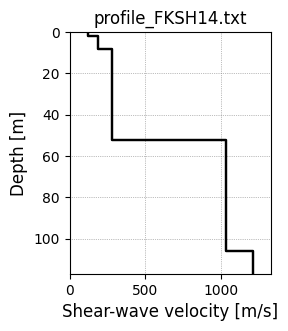

In [4]:
vs_profile.plot();

## 1.2. Initialize an `HH_Calibration` object

Initialize an `HH_Calibration` object with a $V_S$ profile:

In [5]:
hh_c = HH_Calibration(vs_profile)

## 1.3. Calculate HH parameters

Use the `fit()` method to generate HH parameters that describe modulus reduction ($G/G_{\max}$) behaviors of each layer:

========== Start optimizing for HH_G parameters ===========
------ G/Gmax not provided; will generate MKZ curves using Darendeli (2001): ------
-----------  FKZ optimization  -----------------------------
1/5: mu = 0.220, a = 100.0, gamma_t = 0.052%, d = 0.902
2/5: mu = 0.199, a = 100.0, gamma_t = 0.186%, d = 0.902
3/5: mu = 0.249, a = 100.0, gamma_t = 0.010%, d = 0.858
4/5: mu = 1.000, a = 100.0, gamma_t = 0.010%, d = 0.981
5/5: mu = 1.000, a = 100.0, gamma_t = 0.011%, d = 0.978


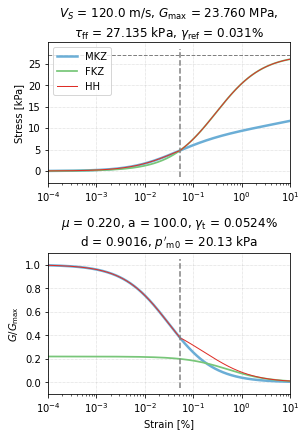

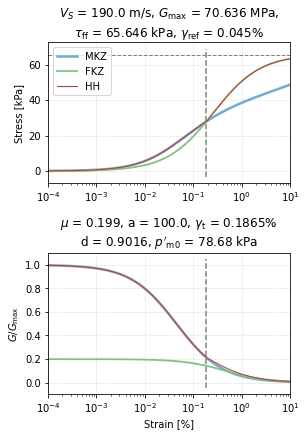

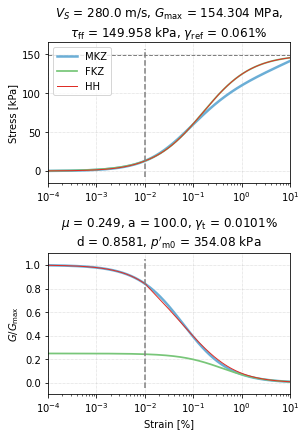

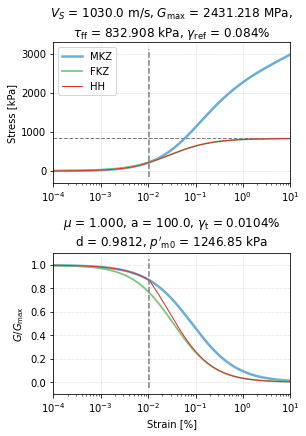

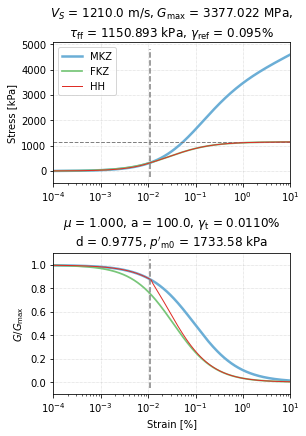

In [6]:
hh_g_param = hh_c.fit(show_fig=True)

## 1.4. Process the output

`hh_g_param` is a `HH_Param_Multi_Layer` object ([API documentation](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_parameters.html#PySeismoSoil.class_parameters.HH_Param_Multi_Layer)).

`hh_g_param` contains information of the HH model parameters of each soil layer, and you can use it directly in the nonlinear site response analyses --- see the demonstration [here](./Pipeline_05_Nonlinear_Method.ipynb).

In [7]:
type(hh_g_param)

PySeismoSoil.class_parameters.HH_Param_Multi_Layer

### 1.4.1. Get parameter values

You can use `serialize_to_2D_array()` and/or `save_txt()` method to access/export the HH parameters:

In [8]:
np.set_printoptions(precision=4, suppress=True, linewidth=100)
hh_g_param.serialize_to_2D_array()  # 5 columns for 5 soil layers; 9 rows for 9 HH parameters of each layer

array([[5.2396e-04, 1.8650e-03, 1.0116e-04, 1.0412e-04, 1.1031e-04],
       [1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02],
       [3.0982e-04, 4.4774e-04, 6.1414e-04, 8.4377e-04, 9.4640e-04],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
       [9.1900e-01, 9.1900e-01, 9.1900e-01, 9.1900e-01, 9.1900e-01],
       [2.3760e+07, 7.0636e+07, 1.5430e+08, 2.4312e+09, 3.3770e+09],
       [2.1979e-01, 1.9904e-01, 2.4933e-01, 1.0000e+00, 1.0000e+00],
       [2.7135e+04, 6.5646e+04, 1.4996e+05, 8.3291e+05, 1.1509e+06],
       [9.0156e-01, 9.0156e-01, 8.5814e-01, 9.8116e-01, 9.7754e-01]])

### 1.4.2. Construct $G/G_{\max}$ and damping curves from the parameter values

With the `construct_curves()` method, you can generate $G/G_{\max}$ and damping curves corresponding to the HH parameters.

In [9]:
ggmax_curves, damping_curves = hh_g_param.construct_curves()

In [10]:
type(ggmax_curves)

PySeismoSoil.class_curves.Multiple_GGmax_Curves

In [11]:
type(damping_curves)

PySeismoSoil.class_curves.Multiple_Damping_Curves

`ggmax_curves` is a `Multiple_GGmax_Curves` object ([API documentation](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_curves.html#PySeismoSoil.class_curves.Multiple_GGmax_Curves)), and `damping_curves` is a `Multiple_Damping_Curves` object ([API documentation](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_curves.html#PySeismoSoil.class_curves.Multiple_Damping_Curves)).

- You can use `ggmax_curves` in the equivalent linear site reaponse analyses --- see the demonstration [here](./Pipeline_04_Equivalent_Linear_Method.ipynb).
- You can use `damping_curves` to calibrate HH (or MKZ) model parameters ([demonstration](./Demo_04_Curves.ipynb#3.3.-Obtain-HH-and-MKZ-damping-parameters-of-all-layers)) to be used in nonlinear site response analyses ([demonstration](./Pipeline_05_Nonlinear_Method.ipynb)).

# 2. Users know profiles of $V_S$ and shear strength

If the users also know the shear strengths of each soil layer, they can incorporate that information to get HH parameters that better reflect the real-world soil behaviors.

(If shear strength is unknown, `PySeismoSoil` can infer the shear strength from $V_S$ based mainly on the empirical correlation proposed by [Ladd (1991)](https://doi.org/10.1061/(ASCE)0733-9410(1991)117:4(540)).)

In [12]:
Tau_max_profile = np.array([25e3, 40e3, 160e3, 800e3, 1200e3])  # unit: Pa
hh_c_2 = HH_Calibration(vs_profile, Tmax_profile=Tau_max_profile)

And then the users can use the `fit()` method as before.

# 3. Users know $V_S$ profiles and $G/G_{\max}$ curves for smaller strains

`PySeismoSoil` can use $G/G_{\max}$ curves of each soil layer to calibrate the MKZ parameters, instead of empirically produce them using formulas by [Darendeli (2001)](https://repositories.lib.utexas.edu/handle/2152/10396). ("MKZ" stands for the "modified Kondner-Zelasko model", a 1D stress-strain model proposed by [Matasovic and Vucetic, 1993](https://doi.org/10.1061/(ASCE)0733-9410(1993)119:11(1805)). And MKZ model parameters are a subset of HH model parameters.)

In [13]:
from PySeismoSoil.class_curves import Multiple_GGmax_Curves

In [14]:
ggmax_curves = Multiple_GGmax_Curves('../tests/files/curve_FKSH14.txt')
hh_c_3 = HH_Calibration(vs_profile, GGmax_curves=ggmax_curves)

========== Start optimizing for HH_G parameters ===========
------ G/Gmax provided; fitting MKZ curves to data: ------
****** MKZ parameters: ******
Layer 0: gamma_ref = 0.000285, s = 0.919, beta = 1.75
Layer 1: gamma_ref = 0.000516, s = 0.919, beta = 1.71
Layer 2: gamma_ref = 0.000945, s = 0.919, beta = 1.64
Layer 3: gamma_ref = 0.0013, s = 0.919, beta = 1.59
Layer 4: gamma_ref = 0.00145, s = 0.919, beta = 1.56
-----------  FKZ optimization  -----------------------------
1/5: mu = 0.233, a = 100.0, gamma_t = 0.030%, d = 0.938
2/5: mu = 0.199, a = 100.0, gamma_t = 0.010%, d = 0.851
3/5: mu = 0.254, a = 100.0, gamma_t = 0.010%, d = 0.862
4/5: mu = 1.000, a = 100.0, gamma_t = 0.010%, d = 0.985
5/5: mu = 1.000, a = 100.0, gamma_t = 0.010%, d = 0.981


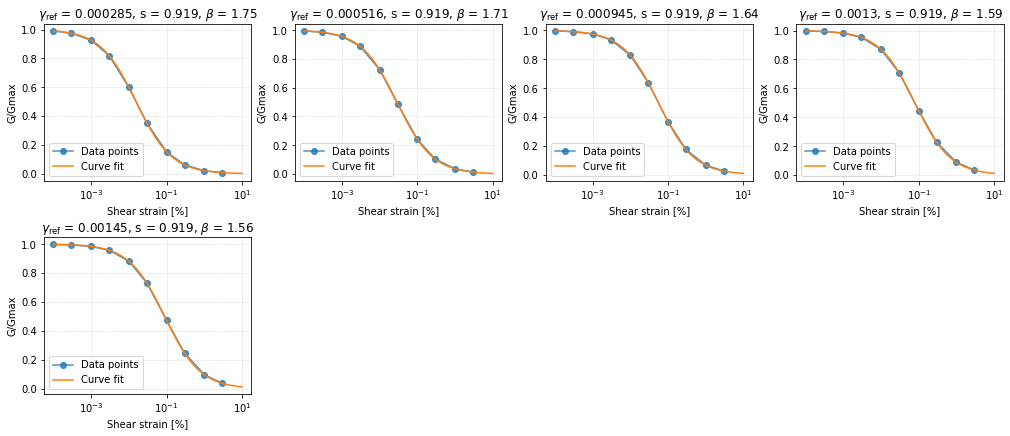

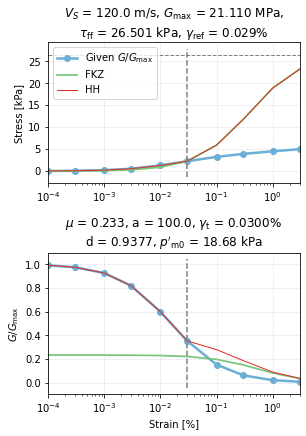

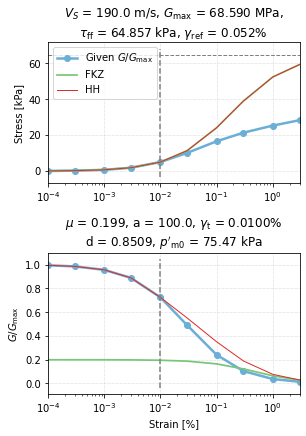

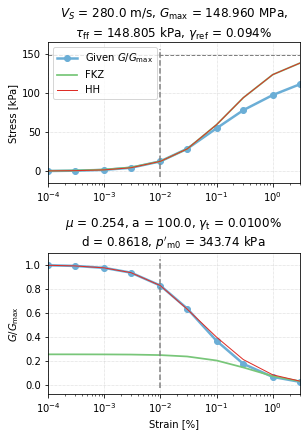

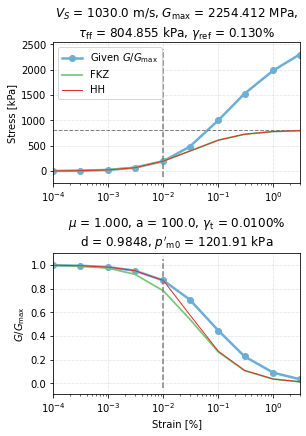

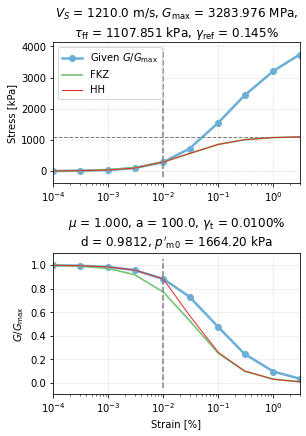

In [15]:
hh_c_3.fit(show_fig=True);

# 4. Users know $V_S$ profiles, $G/G_{\max}$ curves for smaller strains, and shear strengths

The users can also supply shear strengths, if they have that information:

In [16]:
hh_c_4 = HH_Calibration(vs_profile, GGmax_curves=ggmax_curves, Tmax_profile=Tau_max_profile)

And use the `fit()` method to get HH parameters, just as shown above.